# Regressionsanalyse der Merkmale

## Einleitung

In diesem Jupyter Notebook geht es, um die Regressionsanalyse zwischen der Geschwindigkeit und den erfassten Messwerten innerhalb des gegebenen Zeitfensters.

In [1]:
import math
import pandas
import numpy as np
import seaborn as sns
import os
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import linregress

In [2]:
# Lesen der Merkmale
featuresDf = pandas.read_csv("../daten/merkmale_datensatz_26_bis_27/absMesswerte/merkmale.csv")
featuresDf.describe()

,Unnamed: 0,Zeitstempel in Unixzeit,Breitengrad,Laengengrad,Geschwindigkeit in km/h,Anzahl der Messwerte,Start des Zeitfensters in ns seit Start der JVM,Start der Messwerterfassung in ns seit Start der JVM,Start der Belichtung in ns seit Start der JVM,Belichtungszeit in ns,...,Varianz X-Achse Beschleunigung in m/s^2,Varianz Y-Achse Beschleunigung in m/s^2,Varianz Z-Achse Beschleunigung in m/s^2,Varianz Nick in rad,Varianz Roll in rad,Standardabweichung X-Achse Beschleunigung in m/s^2,Standardabweichung Y-Achse Beschleunigung in m/s^2,Standardabweichung Z-Achse Beschleunigung in m/s^2,Standardabweichung Nick in rad,Standardabweichung Roll in rad
count,4963.000000,4.963000e+03,4963.000000,4963.000000,4963.000000,4963.000000,4.963000e+03,4.963000e+03,4.963000e+03,4.963000e+03,...,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000
mean,2481.000000,1.525693e+12,53.583963,10.084546,15.184848,62.252871,1.527235e+13,1.527227e+13,1.527260e+13,9.923256e+06,...,0.855972,7.251478,7.945635,0.069539,0.161104,0.817209,2.170656,2.398502,0.244832,0.298964
std,1432.839023,1.231895e+07,0.016691,0.035909,4.105801,0.448394,9.408304e+12,9.408303e+12,9.408305e+12,9.941265e+06,...,1.098236,12.244620,10.768514,0.049929,0.262608,0.433797,1.593814,1.480967,0.097968,0.267842
min,0.000000,1.525679e+12,53.556515,10.020442,5.004000,60.000000,4.720012e+12,4.719938e+12,4.720260e+12,7.630070e+05,...,0.013490,0.028860,0.030100,0.001940,0.000940,0.116150,0.169880,0.173490,0.044050,0.030660
25%,1240.500000,1.525681e+12,53.571229,10.054037,12.492000,62.000000,6.161229e+12,6.161143e+12,6.161476e+12,2.298216e+06,...,0.263510,1.211805,1.791545,0.027065,0.009520,0.513335,1.100820,1.338485,0.164515,0.097570
50%,2481.000000,1.525682e+12,53.579170,10.094249,15.624002,62.000000,7.806778e+12,7.806702e+12,7.807027e+12,5.331862e+06,...,0.515080,2.880070,3.927960,0.057600,0.031830,0.717690,1.697080,1.981910,0.240000,0.178410
75%,3721.500000,1.525705e+12,53.597912,10.116828,18.108002,63.000000,2.491194e+13,2.491186e+13,2.491218e+13,1.000184e+07,...,1.014400,6.886500,9.547350,0.104750,0.199940,1.007175,2.624210,3.089880,0.323655,0.447150
max,4962.000000,1.525707e+12,53.613850,10.137879,24.948000,67.000000,2.659563e+13,2.659555e+13,2.659587e+13,2.999632e+07,...,18.796390,109.496300,104.803140,0.232420,1.586570,4.335480,10.464050,10.237340,0.482100,1.259590


In [3]:
# Gibt die Spaltennamen aus
featuresDf.columns

Index(['Unnamed: 0', 'Zeitstempel in Unixzeit', 'Breitengrad', 'Laengengrad',
       'Geschwindigkeit in km/h', 'X-Achse Beschleunigungswerte in m/s^2',
       'Y-Achse Beschleunigungswerte in m/s^2',
       'Z-Achse Beschleunigungswerte in m/s^2', 'Gier Messwerte in rad',
       'Nick Messwerte in rad', 'Roll Messwerte in rad',
       'Zeitstempel der Messwerte in ns', 'Anzahl der Messwerte',
       'Start des Zeitfensters in ns seit Start der JVM',
       'Start der Messwerterfassung in ns seit Start der JVM',
       'Start der Belichtung in ns seit Start der JVM',
       'Belichtungszeit in ns',
       'Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM',
       'Stopp der Messwerterfassung in Unixzeit',
       'Mittelwert X-Achse Beschleunigung in m/s^2',
       'Mittelwert Y-Achse Beschleunigung in m/s^2',
       'Mittelwert Z-Achse Beschleunigung in m/s^2', 'Mittelwert Nick in rad',
       'Mittelwert Roll in rad', 'Gier-Aenderung in rad',
       'Varianz X-Achse 

## Zusammenhang Geschwindigkeit und Messwerte: Datensatz 15-22


### Versuchsaufbau

In den folgenden Diagrammen wird die Geschwindigkeit gegen die berechneten Merkmale Beschleunigungssensordaten der Z-Achse und Nick-Winkel innerhalb eines Zeitfensters dargestellt. Berechnet wurden der Arithmetische Mittelwert, Varianz und Standardabweichung der Messwerte. Dabei wird auch untersucht wie sich das Ergebnis ändert, wenn von allen Messwerten der absolut Betrag genommen wird. Untersucht werden die Daten aus den Datensätzen 15 bis 22.   

### Hypothese

Erwartet wird das der Mittelwert, Varianz und Standardabweichung mit zunehmender Geschwindigkeit auch zunimmt. In der Regressionsanalyse muss zu Beginn festgelegt werden, welche der Variablen als abhängig und welche als unabhängig betrachtet wird. Bei diesem Versuch wird angenommen, dass die Sensormesswerte die abhängige $y$ und die Geschwindigkeit die unabhängige Variable $x$ ist. Es wird also eine einseitige stochastische Abhängigkeit mit linearer Regression untersucht. 
Die Gleichung zeigt 1 die Regressionsfunktion wobei $y$ als mittlere Abhängigkeit $\bar{y}$ gesucht wird.  

$$
\bar{y} = f(x)
$$ <div style="text-align: right"><i>(1)</i></div>

Eine Abweichung der Hypothese müsste sich durch verschiedene Oberflächenqualitäten des Weges ergeben also der Stochastischen empirischen Beobachtung. Eine Wegstrecke mit 
vielen Unebenheiten müsste relativ hohe Abweichungen der Messwerte ergeben auch bei einer geringen Geschwindigkeit. 

### Versuchsdurchführung

#### Versuch 1: Analyse der Mittelwerte 

In diesem Versuch wird der Mittelwert aller Mittelwerte für die Z-Achse des Beschleunigungssensors sowie Nick Winkel berechnet und ein Histogramm geplottet mit der Häufigkeit eines Mittelwertbereichs. Dies erfolgt einmal mit und ohne den absolut Messwerten. Erwartet wird, dass der Mittelwert höher ist mit dem absoluten Betrag.

#### Versuch 2: Geschwindigkeit gegenüber Z-Achse des Beschleunigungssensors

Das Merkmal Geschwindigkeit in km/h soll gegenüber den Mittelwerten des Z-Achse Beschleunigungssensors in einem Streudiagramm geplottet werden. Dabei wird mit der Methode linregress eine gerade mit Steigung berechnet siehe Gleichung 2 und geplottet. 

$$
\bar{y} = b_0 + b_1 * x
$$ <div style="text-align: right"><i>(2)</i></div>

Die gerade sollte eine positive Steigung haben, wenn ein Positiver linearer Zusammenhang zwischen den Merkmalen existiert. Dabei besagt die Nullhypothese, dass es keinen Zusammenhang zwischen den beiden Merkmalen gibt. Ein p-Wert der von der Methode linregress zurückgegeben wird sollte einen einen Wert kleiner 0.05 damit die Nullhypothese verworfen werden kann. Des Weiteren wird der Korrelationskoeffizient ausgewertet. Ein perfekter linearer Zusammenhang hat einen Korrelationskoeffizienten von -1 für einen Negativen und +1 für einen positiven linearen Zusammenhang.   

#### Versuch 3: Zusammenhang zwischen Geschwindigkeit und Nick-Winkel

Es wird die Korrelation zwischen Geschwindigkeit und Nick-Winkel untersucht. Wie in Versuch 2 werden die Rückgabewerte der Methode linregress betrachtet.

#### Versuch 4: 

Mit der pandas DataFrame Methode corr wird ein anderer Ansatz untersucht, um Parameter Korrelationen des Merkmals Geschwindigkeit zu finden. 

#### Versuch 5: Monotoner Zusammenhang

Die Ergebnisse aus Versuch 2-4 zeigten das es einen schwachen linearen Zusammenhang zwischen Geschwindigkeit und Nick-Winkeln bzw. Z-Achsen Beschleunigung gibt. In diesem Versuch wird untersucht ob es einen monotonen Zusammenhang zwischen den Merkmalen existiert also eine monotone Funktion. Hier wird die Methode pandas DataFrame corr genutzt mit dem Parameter Spearman. Der Korrelationskoeffizient wird ähnlich wie bei der Pearson Methode berechnet. Dabei werden von den genutzten Variablen der Daten die Rankwerte genutzt bei der Spearman Methode. 

#### Versuch 6: Häufigkeitsverteilung der Geschwindigkeit

Hier sollö die Häufigkeitsverteilung der Geschwindigkeit geplottet werden. Dabei ist interessant, dass ab der Geschwindigkeit von 20 km/h die Anzahl der Datenwerte abnimmt (siehe Abb. 8). Nach den Abbildungen 3-8 sind, um die 17 km/h die meisten Geschwindigkeitswerte zu erkennen.  

#### Versuch 7: 

Die Hypothese, dass der Korrelationskoeffizient zwischen verschiedenen Geschwindigkeiten unterschiedlich ist wird betrachtet. Hierbei wird der lineare Regression Methode Korrelationskoeffizient in 5 km/h Schritten berechnet. In 4 Geschwindigkeitsabschnitten wird in diesem Versuch der Korrelationskoeffizient ermittelt. Als Merkmale werden ohne absolut Betrag die Standardabweichung von Nick-Winkel und Z-Achse Beschleunigung genommen, weil diese in den vorherigen versuchen einen hohen Korrelationskoeffizienten hatten. Erwartet wird das der Korrelationskoeffizient nicht konstant und zu Beginn höher ist.

#### Ergebnis

##### Versuch 1: Analyse der Mittelwerte
Der Versuch hat ergeben das der Mittelwert über den Mittelwerten ohne den absolut Betrag gegen 0 tendieren(siehe Tab. 1). Mit absoluten Beträgen der Messwerte haben die Mittelwerte einen größeren Wertebereich (vergleiche Abb. 1 mit Abb. 2).  

<img src="../daten/abbildungen/AbsolutBetragMesswerteMittelwertZAchse.png" alt="Absolut Betrag Messwerte Mittelwert Z-Achse" />
Abbildung 1: Diagramm mit Mittelwerte der absoluten Beträge der Z-Achse Beschleunigungsdaten in m/s^2 Häufung

<img src="../daten/abbildungen/MittelwerteZAchseohneAbs.png" alt="Absolut Betrag Messwerte Mittelwert Z-Achse" />
Abbildung 2: Diagramm mit Mittelwerte der Z-Achse Beschleunigungsdaten in m/s^2 Häufung

Absolut Betrag (J/N)| Mittelwert Z-Achse Beschleunigung in m/s^2 | Mittelwert Nick in rad
--- | --- | --- |
Nein | 0.000155984548789 | -0.0531509729904 |
Ja   | 3.32637531199     | 0.3421946794 |
Tabelle 1: Vergleich Mittelwert mit und ohne absolut Betrag der Messwerte

##### Versuch 2:

In Tab. 2 sind die Rückgabeparameter der SciPy Methode linregress zu sehen. Hierbei wird unterschieden zwischen dem absoluten Betrag der Z-Achse Beschleunigungssensordaten und mit ohne diesen. Auf Abb. 3 ist auf dem linken Diagramm zu sehen, dass ohne absolut betrag die Mittelwerte, um 0 liegen. Dadurch ergibt sich auch keine Steigung und ein p-Wert von 0.9816. Der Wert gibt an wie wahrscheinlich es ist das die Nullhypothese zutrifft. In diesem Fall gibt es also keinen Zusammenhang zwischen den beiden Merkmalen. Bei den anderen Ergebnissen aus diesem Versuch kann die Nullhypothese verworfen werden. Auf der Abb. 4-5 ist zu sehen, dass mit absolut Betrag der Wertebereich der Y-Achse sich geändert hat. Der Wertebereich ist mit absolut Betrag niedriger geworden. Vergleiche auf Abb. 5 den Wertebereich der Y-Achse mit 0 m/s^2 bis 25 m/s^2 auf der linken Seite und mit 0-14m/s^2 auf mit absolut Betrag auf der rechten Seite. Der Korrelationskoeffizient (rvalue) ist positiv und am höchsten für die Standardabweichung mit 0.1256 mit ohne absolut Betrag der Messwerte. Bei der Betrachtung der Mittelwerte ohne absolut Wert ist der Koeffizient niedrig. Es gibt in diesen Versuch also einen niedrigen Zusammenhang zwischen den beiden Merkmalen.   

Absolut Betrag (J/N) |  Lineare Regression Parameter: Mittelwert Z-Achse Beschleunigung | Lineare Regression Parameter: Varianz Z-Achse Beschleunigung | Lineare Regression Parameter: Standardabweichung Z-Achse Beschleunigung 
--- | --- | --- | --- |
Nein | slope=0.0, intercept=-0.0001, stderr=0.0007, pvalue= 0.9816, rvalue=0.0001 | slope=0.9916 intercept=9.2046, stderr= 0.0328, pvalue=0.0, rvalue=0.0948 | slope=0.0927 intercept=2.6370, stderr=0.0023, pvalue=0.0, rvalue=0.1256 |
Ja | slope=0.0757 intercept=2.2034, stderr= 0.0019, pvalue=0.0, rvalue=0.1239 | slope=0.3383 intercept=3.1565, stderr=0.0111, pvalue=0.0, rvalue=0.0957 | slope=0.0547 intercept=1.52, stderr= 0.0014, pvalue=0.0, rvalue=0.1254 | 
Tabelle 2: Ergebnisse mit linear Regression Parameter für die Z-Achsen Beschleunigung

Ohne absolut Betrag der Messwerte | Mit absolut Betrag der Messwerte |
--- | --- | 
<img src='../daten/abbildungen/KorrelationGeschwindigkeitMittelwertZAchseBeschleunigungOhneAbs.png' alt='Korrelation Geschwindigkeit Z-Achse Beschleunigung' /> | <img src='../daten/abbildungen/KorrelationGeschwindigkeitMittelwertZAchseBeschleunigung.png' alt='Korrelation Geschwindigkeit Z-Achse Beschleunigung' /> 
Abbildung 3: Streudiagramm Geschwindigkeit mit Mittelwert der Z-Achsen Beschleunigung zu einem Zeitfenster 

Ohne absolut Betrag der Messwerte | Mit absolut Betrag der Messwerte |
--- | --- | 
<img src='../daten/abbildungen/KorrelationGeschwindigkeitVarianzZAchseBeschleunigungOhneAbs.png' alt='Korrelation Geschwindigkeit Z-Achse Beschleunigung' /> | <img src='../daten/abbildungen/KorrelationGeschwindigkeitVarianzZAchseBeschleunigung.png' alt='Korrelation Geschwindigkeit Z-Achse Beschleunigung' /> 
Abbildung 4: Streudiagramm Geschwindigkeit mit Varianz der Z-Achsen Beschleunigung zu einem Zeitfenster 

Ohne absolut Betrag der Messwerte | Mit absolut Betrag der Messwerte | 
--- | --- | 
<img src='../daten/abbildungen/KorrelationGeschwindigkeitStandardabweichungZAchseBeschleunigungOhneAbs.png' alt='Korrelation Geschwindigkeit Z-Achse Beschleunigung' /> | <img src='../daten/abbildungen/KorrelationGeschwindigkeitStandardabweichungZAchseBeschleunigung.png' alt='Korrelation Geschwindigkeit Z-Achse Beschleunigung' /> 
Abbildung 5: Streudiagramm Geschwindigkeit mit Standardabweichung der Z-Achsen Beschleunigung zu einem Zeitfenster 

##### Versuch 3: Geschwindigkeit und Nick-Winkel

Die Gerade bei der gefundenen linearen Regression Modell für den Mittelwert ohne absolut Betrag hat eine negative Steigung zurückgegeben (siehe Tab. 3). Der p-Wert ist 0 aber die Nullhypothese sollte trotzdem gelten. Die Interpretation des p-Wertes steht auch unter Kritik. Verwiesen wird hier auf [The earth is flat (p > 0.05): significance thresholds and the crisis of unreplicable research]( http://localhost:8888/notebooks/Documents/FahrradwegeKlassifizierung/datenvisualisierung/featureCorrelations.ipynb). Der p-Wert wird mit dem Wald-Test berechnet. Der Korrelationskoeffizient ist am höchsten mit 0.1805 für die Standardabweichung ohne absolut Betrag der Messwerte. Mit absolut Betrag ist der Koeffizient niedriger. Auch für die Varianz gilt dies mit einer Differenz von ca. 0.0267. Für den Mittelwert ohne absolut Betrag ist der Koeffizient negativ mit -0.0353.    

Absolut Betrag (J/N) |  Lineare Regression Parameter: Mittelwert Nick-Winkel in rad | Lineare Regression Parameter: Varianz Nick-Winkel in rad | Lineare Regression Parameter: Standardabweichung Nick-Winkel in rad 
--- | --- | --- | --- |
Nein | slope=-0.0012 intercept=-0.0352, stderr= 0.0001, pvalue=0.0, rvalue=-0.0353 | slope=0.0074 intercept=0.0852, stderr=0.0001, pvalue=0.0, rvalue=0.1621 | slope=0.0089 intercept=0.2670, stderr= 0.0002, pvalue=0.0, rvalue=0.1805 | 
Ja | slope=0.0073 intercept=0.2346, stderr=0.0001, pvalue=0.0, rvalue=0.1691 | slope=0.0020 intercept=0.0415, stderr=0.0, pvalue=0.0, rvalue=0.1354 | slope=0.0043 intercept=0.1798, stderr=0.0001, pvalue=0.0, rvalue=0.1551 
Tabelle 3: Ergebnisse mit linear Regression Parameter für den Nick-Winkel

Ohne absolut Betrag der Messwerte | Mit absolut Betrag der Messwerte |
--- | --- | 
<img src='../daten/abbildungen/KorrelationGeschwindigkeitMittelwertNickWinkelOhneAbs.png' alt='Korrelation Geschwindigkeit Z-Achse Beschleunigung' /> | <img src='../daten/abbildungen/KorrelationGeschwindigkeitMittelwertNickWinkel.png' alt='Korrelation Geschwindigkeit Mittelwerte Nick-Winkel' /> 
Abbildung 6: Streudiagramm Geschwindigkeit mit Nick-Winkel Mittelwerte 

Ohne absolut Betrag der Messwerte | Mit absolut Betrag der Messwerte |
--- | --- | 
<img src='../daten/abbildungen/KorrelationGeschwindigkeitvarianzNickWinkelOhneAbs.png' alt='Korrelation Geschwindigkeit Z-Achse Beschleunigung' /> | <img src='../daten/abbildungen/KorrelationGeschwindigkeitVarianzNickWinkel.png' alt='Korrelation Geschwindigkeit varianz Nick-Winkel' />
Abbildung 7: Streudiagramm Geschwindigkeit mit Nick-Winkel Varianz  

Ohne absolut Betrag der Messwerte | Mit absolut Betrag der Messwerte |
--- | --- | 
<img src='../daten/abbildungen/KorrelationGeschwindigkeitStandardabweichungNickWinkelOhneAbs.png' alt='Korrelation Geschwindigkeit Standardabweichung Nick-Winkel' /> | <img src='../daten/abbildungen/KorrelationGeschwindigkeitStandardabweichungNickWinkel.png' alt='Korrelation Geschwindigkeit Standardabweichung Nick-Winkel' />
Abbildung 8: Streudiagramm Geschwindigkeit mit Nick-Winkel Standardabweichung  

###### Versuch 4:

Die Ergebnisse sind auf den Tabellen 4 und 5 zu sehen. Dabei fällt auf das die Korrelationskoeffizienten den Koeffizienten aus Versuch 2 und 3 ähneln. Die Abweichung nach der 4 Kommastellen lässt sich dadurch erklären, dass die Angaben aus vorherigen Versuchen gerundet sind auf 4 Kommastellen. Die SciPy Methode linregress und corr berechnen vermutlich also den Pearson Korrelationskoeffizient.  

Merkmal | Korrelationskoeffizient | 
--- | --- | 
Standardabweichung Nick in rad                       | 0.180475  
Varianz Nick in rad                                  | 0.162089 
Standardabweichung Z-Achse Beschleunigung in m/s^2   | 0.125567
Varianz Z-Achse Beschleunigung in m/s^2              | 0.094757
Mittelwert Z-Achse Beschleunigung in m/s^2           | 0.000073
Mittelwert Nick in rad                               | -0.035270
Tabelle 4: Ohne absolut Betrag: Pearson Korrelationskoeffizienten

Merkmal | Korrelationskoeffizient | 
--- | --- | 
Mittelwert Nick in rad                                | 0.169129
Standardabweichung Nick in rad                        | 0.155068
Varianz Nick in rad                                   | 0.135415
Standardabweichung Z-Achse Beschleunigung in m/s^2    | 0.125376
Mittelwert Z-Achse Beschleunigung in m/s^2            | 0.123879
Varianz Z-Achse Beschleunigung in m/s^2               | 0.095689
Tabelle 5: Mit absolut Betrag: Pearson Korrelationskoeffizienten

##### Versuch 5: Spearman Methode

Auf Tab. 6 und 7 ist zu sehen, dass die Spearman Korrelationskoeffizienten ähnlich der berechneten Pearson Korrelationskoeffizienten sind.  

Merkmal | Korrelationskoeffizient | 
--- |--- | 
Varianz Nick in rad                                  | 0.160397
Standardabweichung Nick in rad                       | 0.160397
Varianz Z-Achse Beschleunigung in m/s^2              | 0.126174
Standardabweichung Z-Achse Beschleunigung in m/s^2   | 0.126174
Mittelwert Z-Achse Beschleunigung in m/s^2           | -0.006590
Mittelwert Nick in rad                               | -0.044076
Tabelle 6: Ohne absolut Betrag: Spearman Korrelationskoeffizienten


Merkmal | Korrelationskoeffizient | 
--- |--- | 
Mittelwert Nick in rad                               | 0.152878
Standardabweichung Nick in rad                       | 0.139144
Varianz Nick in rad                                  | 0.139144
Mittelwert Z-Achse Beschleunigung in m/s^2           | 0.125995
Varianz Z-Achse Beschleunigung in m/s^2              | 0.125706
Standardabweichung Z-Achse Beschleunigung in m/s^2   | 0.125706
Tabelle 7: Mit absolut Betrag: Spearman Korrelationskoeffizienten

##### Versuch 6: Geschwindigkeitsverteilung

Der Mittelwert der  Geschwindikeit beträgt ca. 14,825 km/h. Auf Abb. 10 ist zu sehen, dass ca. 26% der erfassten Geschwindigkeiten zwischen 15 und 17,5 km/h liegen. Hierbei liegen nur 1,6% der Geschwindigkeiten zwischen 22 und 25 km/h. Dies erklärt auch warum ca. ab 22 km/h die Anzahl der Datenwerte stark abnimmt (siehe Abb. 8). 

<img src='../daten/abbildungen/histogrammGeschwidigkeitDatensatz15_22.png' alt='Histogramm der Geschwindikeits-Verteilung' />
Abbildung 9: Histogramm: Geschwindigkeitsverteilung

<img src='../daten/abbildungen/histogrammRelativeHaeufigkeitGeschwidigkeitDatensatz15_22.png' alt='Histogramm der Geschwindikeits-Verteilung' />
Abbildung 10: Histogramm: Relative Häufigkeit der Geschwindigkeit

##### Versuch 7: Korrelationskoeffizient in 5 km/h ansteigenden Schritten

In Tab. 8 ist zu sehen, dass der Korrelationskoeffizient zwischen 5 km/h und 10 km/h am größten ist. Im Vergleich mit Tab. 2 und 3 ist der Koeffizient größer. Für die Standardabweichung Nick in rad ist dieser, um 0,032 höher. Dies gilt aber nicht für die anderen 3 Geschwindigkeitsbereiche, welche eine Schwächere Korrelation besitzen. Die lineare Korrelation ist am schwächsten zwischen 15 und 20 km/h.   

Absolut Betrag (J/N)  | Merkmal | 5.0km/h <= Geschwindigkeit <= 10.km/h | 10.0km/h <= Geschwindigkeit <= 15.km/h | 15.0km/h <= Geschwindigkeit <= 20.km/h | 20.0km/h <= Geschwindigkeit <= 25.km/h | 
--- | --- | --- | --- | --- | --- |
N | Standardabweichung Nick in rad | 0.2125 Pearson Korrelationskoeffizient | 0.0693 P. K. | 0.0256 P. K. | 0.0663 P. K. | 
N | Standardabweichung Z-Achse Beschleunigung in m/s^2 | 0.1640 P. K. | 0.0476 P. K. | 0.0301 P. K. | 0.0457 P. K. |
Tabelle 8: Ergebnis: Korrelationskoeffizient in 5 km/h ansteigenden Schritten

#### Auswertung

Die Versuche haben ergeben, dass es einen schwachen positiven linearen Regression Zusammenhang zwischen Geschwindigkeit und Z-Achsen Beschleunigung (Abb. 3-5) sowie Nick-Winkel (Abb. 6-8) gibt. Dieser ist stärker zwischen Nick-Winkel und Geschwindigkeit ausgeprägt (Vergleiche Tab. 2 mit 3). Für den absoluten Betrag der Messwerte ist der Korrelationskoeffizient für den Mittelwert bei dem Nick-Winkel, um 0.045 höher als beim Mittelwert der Z-Achse (siehe Tab. 5). In Versuch 5 wurde gezeigt das es auch einen schwachen monotonen Zusammenhang gibt mit der Spearman Methode. Die Korrelationskoeffizienten sind ähnlich wie bei der Pearson Methode aus Versuch 4. Es gibt keinen linearen und monotonen Zusammenhang, wenn nicht der absolute Betrag der Messwerte genutzt wird bei der Berechnung der Mittelwerte (Abb. 3 linke Seite). In Versuch 7 wurde gezeigt, dass der Korrelationskoeffizient der Methode lineregress bei der Aufteilung der Daten in 4 Geschwindigkeitsbereiche am größten (0.2125 siehe Tab. 8) zwischen 5 und 10 km/h ist. Dies lässt auf eine größere Erschütterung schließen beim Abbremsen und anfahren beim Fahrradfahren.

In [4]:
# Mittelwert über die Mittelwerte
print('Mittelwert Z-Achse Beschleunigung: ' + str(featuresDf['Mittelwert Z-Achse Beschleunigung in m/s^2'].mean()))
print('Mittelwert Nick in rad: ' + str(featuresDf['Mittelwert Nick in rad'].mean()))

Mittelwert Z-Achse Beschleunigung: 2.87681137113
Mittelwert Nick in rad: 0.310902107863


C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


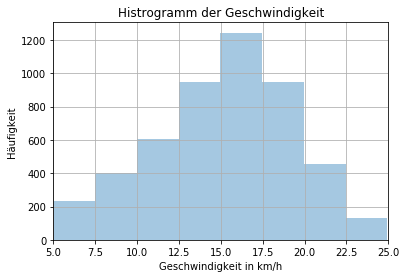

In [5]:
# (Zelle nicht überschreiben) Abs Betrag Mittelwert Z-Achse Beschleunigung in m/s^2
plt.title("Histrogramm der Geschwindigkeit")
sns.distplot(featuresDf['Geschwindigkeit in km/h'], bins=8, kde=False)
plt.ylabel('Häufigkeit')
plt.xlim(5.0,25.0)
plt.grid()
#plt.ylim(0,30000)
#plt.yticks(np.arange(0, 30000, step=4000))
#plt.savefig('histogrammGeschwidigkeitDatensatz15_22')

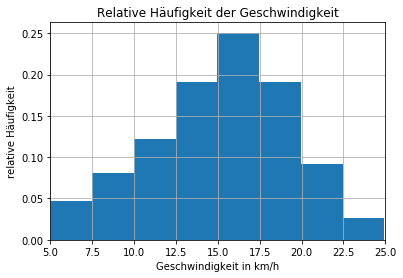

In [6]:
featuresDf['Geschwindigkeit in km/h'].plot.hist(weights=(np.zeros_like(featuresDf['Geschwindigkeit in km/h']) + 1. / featuresDf.shape[0]), bins=8)
plt.title('Relative Häufigkeit der Geschwindigkeit')
plt.ylabel('relative Häufigkeit')
plt.xlabel('Geschwindigkeit in km/h')
plt.xlim(5.0,25.0)
plt.grid()
#plt.yticks(np.arange(0.0, 0.28, step=0.04))
#plt.savefig('histogrammRelativeHaeufigkeitGeschwidigkeitDatensatz15_22')

C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Anzahl der Mittelwerte')

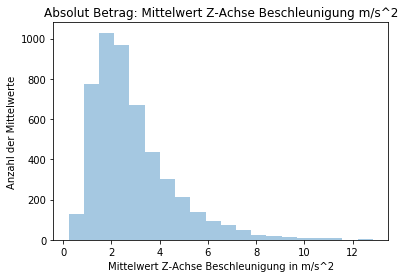

In [7]:
# (Zelle nicht überschreiben) Abs Betrag Mittelwert Z-Achse Beschleunigung in m/s^2
plt.title("Absolut Betrag: Mittelwert Z-Achse Beschleunigung m/s^2")
sns.distplot(featuresDf['Mittelwert Z-Achse Beschleunigung in m/s^2'], bins=20, kde=False)
plt.ylabel('Anzahl der Mittelwerte')
#plt.savefig('AbsolutBetragMesswerteMittelwertZAchse')

C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Anzahl')

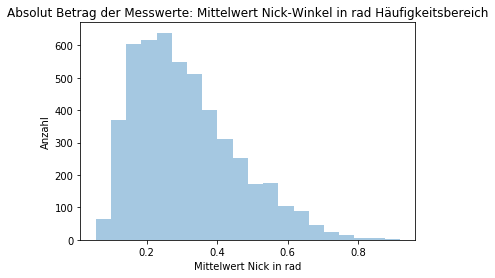

In [8]:
# (Zelle nicht überschreiben) Abs Betrag Mittelwert Nick-Winkel in rad
plt.title("Absolut Betrag der Messwerte: Mittelwert Nick-Winkel in rad Häufigkeitsbereich")
sns.distplot(featuresDf['Mittelwert Nick in rad'], bins=20, kde=False)
plt.ylabel('Anzahl')

C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Anzahl der Mittelwerte')

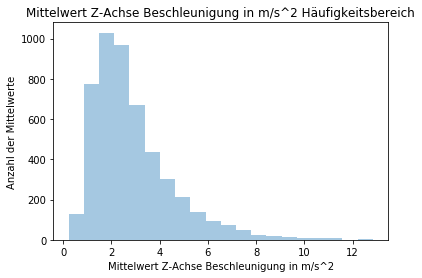

In [9]:
plt.title("Mittelwert Z-Achse Beschleunigung in m/s^2 Häufigkeitsbereich")
sns.distplot(featuresDf['Mittelwert Z-Achse Beschleunigung in m/s^2'], bins=20, kde=False)
plt.ylabel('Anzahl der Mittelwerte')

C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Anzahl')

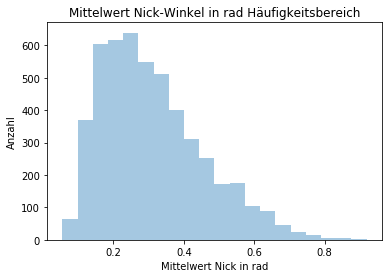

In [10]:
plt.title("Mittelwert Nick-Winkel in rad Häufigkeitsbereich")
sns.distplot(featuresDf['Mittelwert Nick in rad'], bins=20, kde=False)
plt.ylabel('Anzahl')

Linear regression Parameter: slope=0.0553 intercept=1.5592, stderr=0.0051, pvalue=0.0000, rvalue=0.1532384


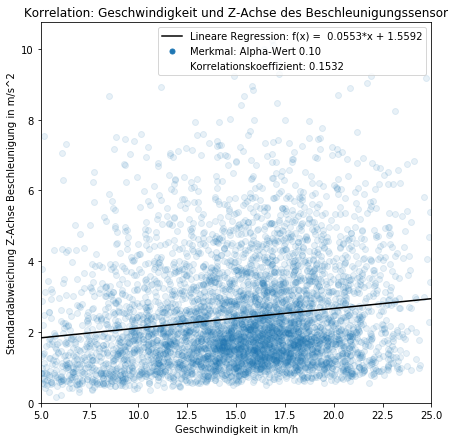

In [11]:
plt.figure(figsize=(7,7))
alpha = 0.1
slope, intercept, rvalue, pvalue, stderr = linregress(featuresDf['Geschwindigkeit in km/h'],featuresDf['Standardabweichung Z-Achse Beschleunigung in m/s^2']) 
slopeString = 'Lineare Regression: f(x) =  %.4f*x + %.4f' % (slope, intercept)
scatterString = 'Merkmal: Alpha-Wert %.2f' % (alpha)
corrlcString = 'Korrelationskoeffizient: %.4f' % (rvalue)
plt.scatter(featuresDf['Geschwindigkeit in km/h'],featuresDf['Standardabweichung Z-Achse Beschleunigung in m/s^2'], alpha = alpha)
lineRegress, = plt.plot(featuresDf['Geschwindigkeit in km/h'].sort_values(), intercept + slope*featuresDf['Geschwindigkeit in km/h'].sort_values()
, 'k', label=slopeString)
plt.xlim(5,25)
plt.ylim(0,)
plt.title('Korrelation: Geschwindigkeit und Z-Achse des Beschleunigungssensor')
plt.xlabel('Geschwindigkeit in km/h')
plt.ylabel('Standardabweichung Z-Achse Beschleunigung in m/s^2')
blueScatter = mlines.Line2D([], [], marker='',
                          markersize=10, label=corrlcString, linestyle=' ')
regressCorellc = mlines.Line2D([], [], color='C0', marker='.',
                          markersize=10, label=scatterString, linestyle=' ')
plt.legend(handles=[lineRegress,regressCorellc,blueScatter], loc=1)
#plt.savefig('KorrelationGeschwindigkeitMittelwertZAchseBeschleunigung')
print('Linear regression Parameter: slope=%.4f intercept=%.4f, stderr=%.4f, pvalue=%.4f, rvalue=%.7f' % (slope, intercept, stderr, pvalue, rvalue))

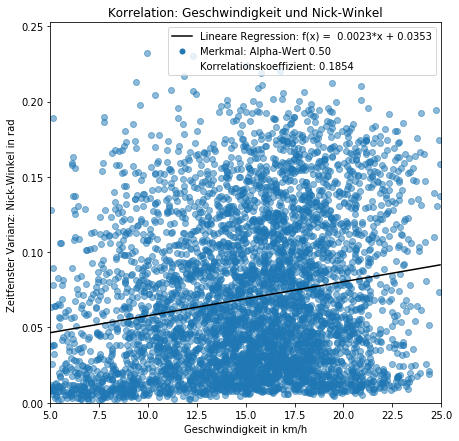

Linear regression Parameter: slope=0.0023 intercept=0.0353, stderr=0.0002, pvalue=0.0000, rvalue=0.1854


In [12]:
plt.figure(figsize=(7,7))
alpha = 0.5
slope, intercept, rvalue, pvalue, stderr = linregress(featuresDf['Geschwindigkeit in km/h'],featuresDf['Varianz Nick in rad']) 
slopeString = 'Lineare Regression: f(x) =  %.4f*x + %.4f' % (slope, intercept)
corrlcString = 'Korrelationskoeffizient: %.4f' % (rvalue)
scatterString = 'Merkmal: Alpha-Wert %.2f' % (alpha)
scatterPitch = plt.scatter(featuresDf['Geschwindigkeit in km/h'],featuresDf['Varianz Nick in rad'], c='C0', alpha = alpha)
lineRegress, = plt.plot(featuresDf['Geschwindigkeit in km/h'].sort_values(), intercept + slope*featuresDf['Geschwindigkeit in km/h'].sort_values()
, 'k', label=slopeString)
plt.xlim(5,25)
plt.ylim(0,)
plt.title('Korrelation: Geschwindigkeit und Nick-Winkel')
plt.xlabel('Geschwindigkeit in km/h')
plt.ylabel('Zeitfenster Varianz: Nick-Winkel in rad ')
regressCorellc = mlines.Line2D([], [], marker='',
                          markersize=10, label=corrlcString, linestyle=' ')
blueScatter = mlines.Line2D([], [], color='C0', marker='.',
                          markersize=10, label=scatterString, linestyle=' ')
plt.legend(handles=[lineRegress,blueScatter,regressCorellc], loc=1)
#plt.savefig('KorrelationGeschwindigkeitMittelwertNickWinkelOhneAbs')
plt.show()
print('Linear regression Parameter: slope=%.4f intercept=%.4f, stderr=%.4f, pvalue=%.4f, rvalue=%.4f' % (slope, intercept, stderr, pvalue, rvalue))

In [13]:
print((featuresDf[featuresDf['Geschwindigkeit in km/h'] >= 22].size / featuresDf.size))

0.0352609308886


In [14]:
# Vergleiche Floatwerte auf annährende "Gleichheit"
def velocityEqual5(row):
    return math.isclose(row['Geschwindigkeit in km/h'],5.0)
def velocityEqual10(row):
    if math.isclose(row['Geschwindigkeit in km/h'],10.0):
        print(row['Geschwindigkeit in km/h'])
    return math.isclose(row['Geschwindigkeit in km/h'],10.0)
def velocityEqual15(row):
    return math.isclose(row['Geschwindigkeit in km/h'],15.0)
def velocityEqual20(row):
    return math.isclose(row['Geschwindigkeit in km/h'],20.0)
def velocityEqual25(row):
    return math.isclose(row['Geschwindigkeit in km/h'],25.0)

Linear regression Parameter: slope=0.1613 intercept=0.6356, stderr=0.0387, pvalue=0.0000, rvalue=0.1632490


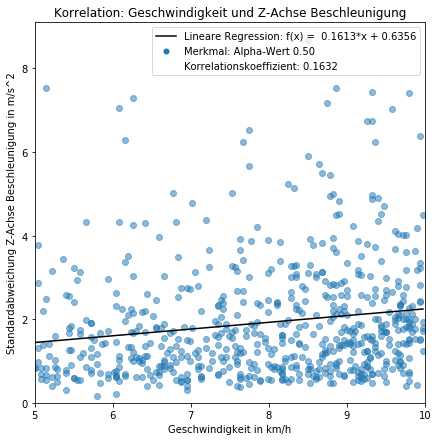

In [16]:
# plot in einem bestimmten Geschwindigkeitsbereich mit Berechnung von lineare Regression
plt.figure(figsize=(7,7))
# km/h Bereich
minKmh = 5
maxKmh = 10
idx = featuresDf[featuresDf['Geschwindigkeit in km/h'] > minKmh].index | featuresDf[featuresDf.apply(velocityEqual5, axis=1)].index
idx = featuresDf.iloc[idx][featuresDf['Geschwindigkeit in km/h'].iloc[idx] < maxKmh].index | featuresDf[featuresDf.apply(velocityEqual10, axis=1)].index
alpha = 0.5
slope, intercept, rvalue, pvalue, stderr = linregress(featuresDf['Geschwindigkeit in km/h'].loc[idx],featuresDf['Standardabweichung Z-Achse Beschleunigung in m/s^2'].iloc[idx]) 
slopeString = 'Lineare Regression: f(x) =  %.4f*x + %.4f' % (slope, intercept)
corrlcString = 'Korrelationskoeffizient: %.4f' % (rvalue)
scatterString = 'Merkmal: Alpha-Wert %.2f' % (alpha)
plt.scatter(featuresDf['Geschwindigkeit in km/h'].iloc[idx],featuresDf['Standardabweichung Z-Achse Beschleunigung in m/s^2'].iloc[idx], alpha = alpha)
lineRegress, = plt.plot(featuresDf['Geschwindigkeit in km/h'].iloc[idx].sort_values(), intercept + slope*featuresDf['Geschwindigkeit in km/h'].iloc[idx].sort_values()
, 'k', label=slopeString)
plt.xlim(minKmh,maxKmh)
plt.ylim(0,)
plt.title('Korrelation: Geschwindigkeit und Z-Achse Beschleunigung')
plt.xlabel('Geschwindigkeit in km/h')
plt.ylabel('Standardabweichung Z-Achse Beschleunigung in m/s^2')
blueScatter = mlines.Line2D([], [], marker='',
                          markersize=10, label=corrlcString, linestyle=' ')
regressCorellc = mlines.Line2D([], [], color='C0', marker='.',
                          markersize=10, label=scatterString, linestyle=' ')
plt.legend(handles=[lineRegress,regressCorellc,blueScatter], loc=1)
print('Linear regression Parameter: slope=%.4f intercept=%.4f, stderr=%.4f, pvalue=%.4f, rvalue=%.7f' % (slope, intercept, stderr, pvalue, rvalue))

In [18]:
featuresDf['Varianz Y-Achse Beschleunigung in m/s^2'].loc[idx]

0        1.98544
1        1.03069
2        0.32404
3        0.53961
4        0.44799
5        1.23103
6        0.42233
9        2.12682
10       1.28193
11       3.30665
12       7.22615
13       4.70602
30       5.49838
36       0.64018
37       0.18005
38       0.51494
39       0.29998
40       1.02856
169     32.06605
170      1.96932
171      4.53770
172      3.79367
211      2.28224
212      4.66873
249     14.53716
250      6.54553
349     15.04637
350     19.23505
380      3.98314
381      5.33583
          ...   
4776     0.65280
4777     1.81789
4778     1.52408
4779     3.22779
4780     1.77521
4781     5.31867
4782     8.45805
4783     3.62009
4784     0.61036
4785     0.57515
4822     0.21980
4823     0.26224
4824     0.84884
4825     0.65645
4826     0.42478
4828     0.55373
4905     0.62309
4927     0.26659
4928     0.59284
4929     0.34565
4930     0.16650
4931     0.21672
4932     7.16517
4933     0.47578
4941     4.14194
4942     1.18852
4946    15.57806
4959     0.429

In [ ]:
featuresDf['Geschwindigkeit in km/h'].mean()